# Análisis de región transmembra
(En progreso)

In [1]:
from scrips import Analisis_transmembrana

ANÁLISIS COMPARATIVO DE REGIONES TRANSMEMBRANALES

 Cadena A:
   Longitud: 316 residuos
   Hidrofobicidad: 58.5%

   Resumen de TMDs detectados:
      Ultra-sensible: 6 TMDs

   Regiones ultra-sensible:
      TM1:  63- 86 (24 aa) Hidro:70.8% Score: 1.83
           IFDVGNAFINIGALGVILIILYNI
      TM2: 101-118 (18 aa) Hidro:72.2% Score: 2.14
           FFQLTLLLIIFTLVVDCG
      TM3: 130-153 (24 aa) Hidro:79.2% Score: 2.17
           FVAIQIGLAGACCWALLIIGFLGF
      TM4: 169-185 (17 aa) Hidro:58.8% Score: 1.42
           GTSMLGFIANFLASILT
      TM5: 200-257 (58 aa) Hidro:77.6% Score: 2.08
           ASGMIVVVYIINAIFLFVFVICQLLVSLLVVRNLWVTGAIFLGLFFFVAGQVLVYAFS
      TM6: 273-283 (11 aa) Hidro:63.6% Score: 1.55
           FGSICNVFTLM

   Recomendación: Para proteínas con 8 TMDs conocidos,
   usa el modo 'ultra_sensitive' o ajusta manualmente los parámetros.


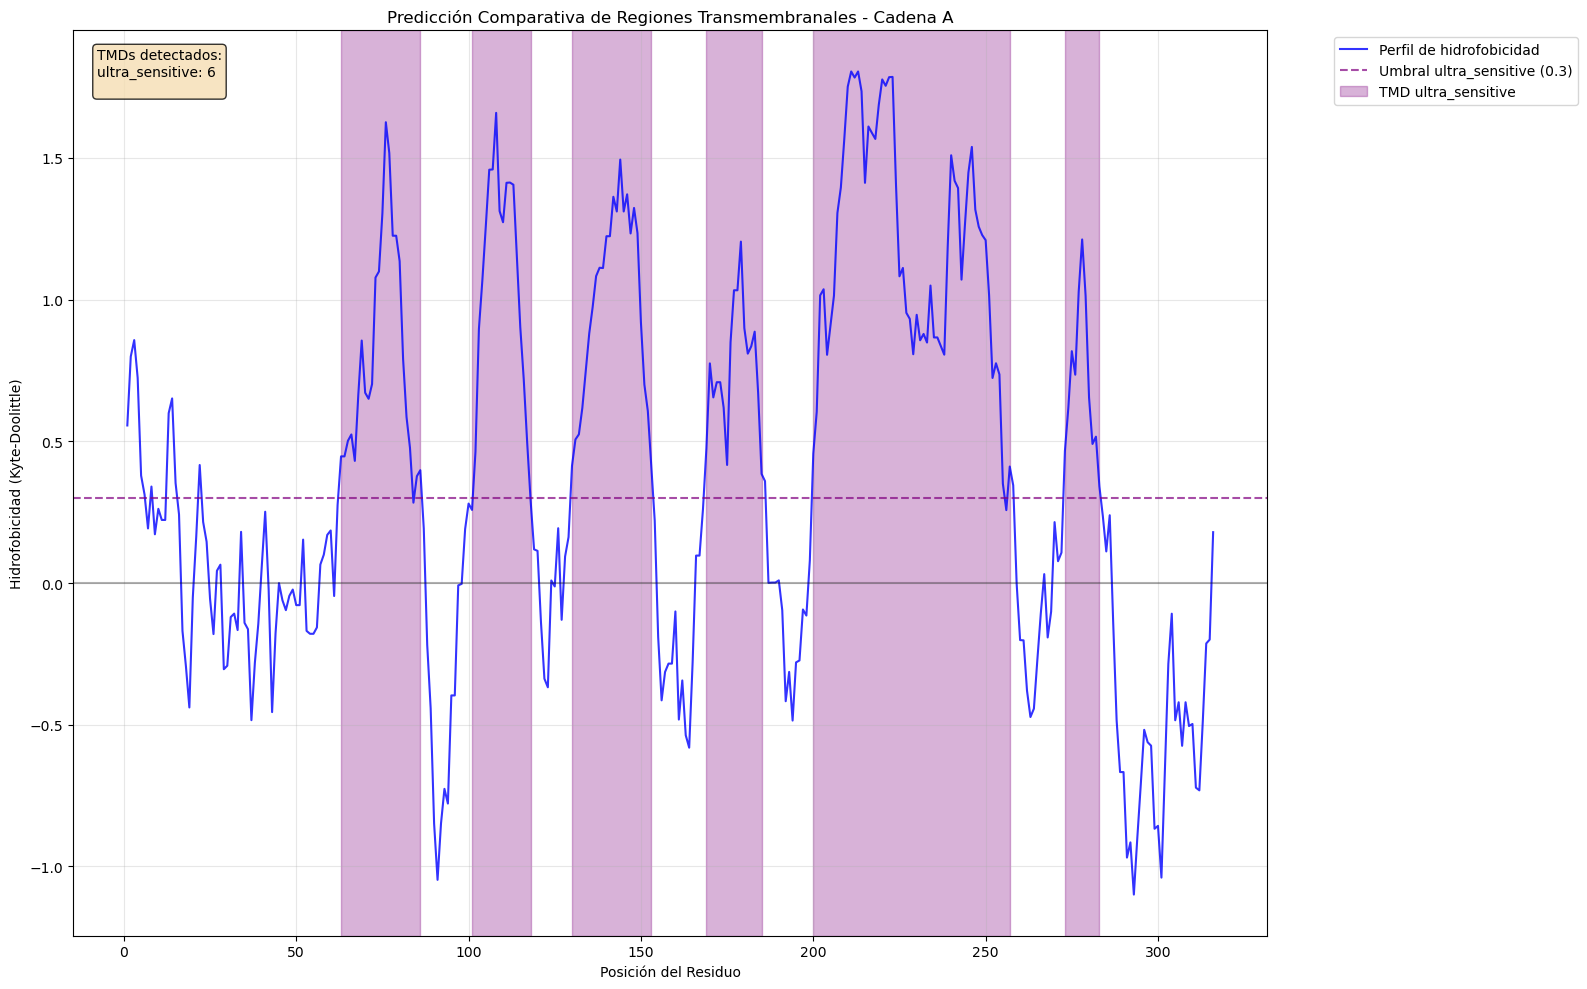

In [2]:
pdb = r"C:\Users\HP\Downloads\AF-P38843-F1-model_v4.pdb"
results = Analisis_transmembrana.analyze_pdb_file(pdb, 'ultra_sensitive')

In [3]:
region_transmembrana = Analisis_transmembrana.results_to_dataframe(results)
region_transmembrana

,chain_id,sequence,length,hydrophobic_content,tmds_ultra_sensitive,regions_ultra_sensitive
0,A,MAFSDFAAICSKTPLPLCSVIKSKTHLILSNSTIIHDFDPLNLNVG...,316,58.544304,6,"[(63, 86), (101, 118), (130, 153), (169, 185),..."


In [4]:
carbonos_alfa = Analisis_transmembrana.structur_protein_df(pdb)
carbonos_alfa.head()

,model,chain,residue_name,residue_id,x,y,z
0,0,A,MET,1,20.976000,-12.536,4.492
1,0,A,ALA,2,21.948999,-9.317,6.269
2,0,A,PHE,3,18.669001,-7.366,5.920
3,0,A,SER,4,20.997999,-4.344,5.127
4,0,A,ASP,5,21.667999,-5.199,1.454


In [5]:
carbonos_alfa['transmembrana'] = Analisis_transmembrana.aa(region_transmembrana, carbonos_alfa) 

In [6]:
carbonos_alfa.head()

,model,chain,residue_name,residue_id,x,y,z,transmembrana
0,0,A,MET,1,20.976000,-12.536,4.492,No_transmembrana
1,0,A,ALA,2,21.948999,-9.317,6.269,No_transmembrana
2,0,A,PHE,3,18.669001,-7.366,5.920,No_transmembrana
3,0,A,SER,4,20.997999,-4.344,5.127,No_transmembrana
4,0,A,ASP,5,21.667999,-5.199,1.454,No_transmembrana


In [7]:
carbonos_alfa.groupby('transmembrana')['transmembrana'].count()

transmembrana
No_transmembrana    164
Transmembrana       152
Name: transmembrana, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [34]:
import pandas as pd

In [40]:
carbonos_alfa.columns

Index(['model', 'chain', 'residue_name', 'residue_id', 'x', 'y', 'z',
       'transmembrana', 'verdaderos'],
      dtype='object')

In [42]:
dummies_trans = pd.get_dummies(
    carbonos_alfa['transmembrana'],
    prefix='transmembrana',
    drop_first=True,
    dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )



In [46]:
df_trans = pd.concat([carbonos_alfa, dummies_trans['transmembrana_Transmembrana']], axis=1)

In [55]:

X = df_trans[['x','y','z']]
Y = df_trans['transmembrana_Transmembrana']


linear = SVC(kernel='rbf', C=1, gamma='scale')
linear.fit(X,Y)

SVC(C=1)

In [56]:
prediccion = linear.predict(X)
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
carbonos_alfa['prediccion'] = prediccion

In [53]:
carbonos_alfa.head()

,model,chain,residue_name,residue_id,x,y,z,transmembrana,verdaderos,prediccion
0,0,A,MET,1,20.976000,-12.536,4.492,No_transmembrana,False,1
1,0,A,ALA,2,21.948999,-9.317,6.269,No_transmembrana,False,1
2,0,A,PHE,3,18.669001,-7.366,5.920,No_transmembrana,False,1
3,0,A,SER,4,20.997999,-4.344,5.127,No_transmembrana,False,0
4,0,A,ASP,5,21.667999,-5.199,1.454,No_transmembrana,True,0


In [54]:
cero = carbonos_alfa[carbonos_alfa['prediccion'] == 1]
cero.to_csv('verdaderos.csv', index=False)

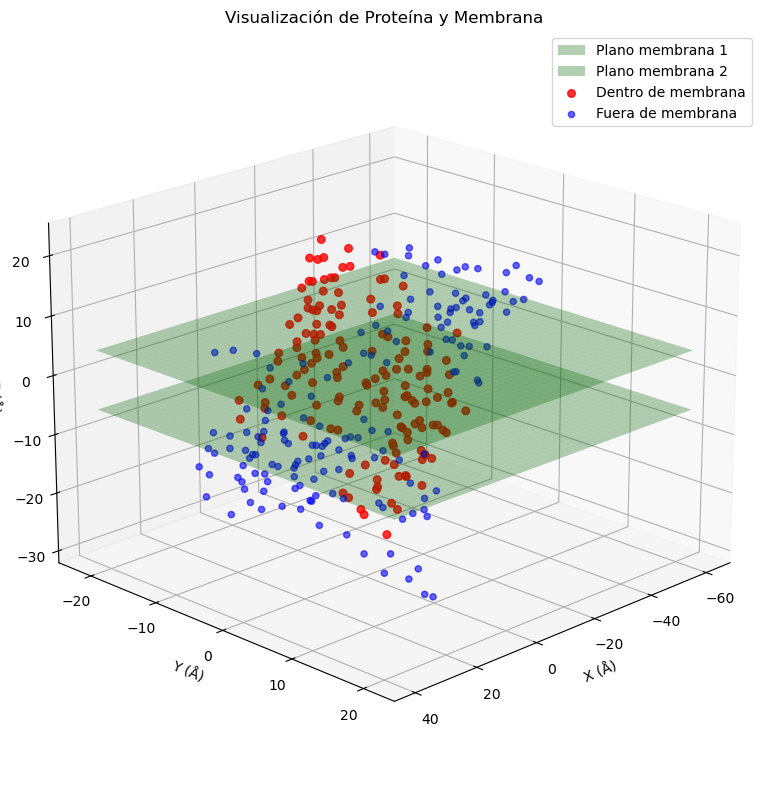

=== ANÁLISIS DE DATOS ===
Total de residuos: 316
Residuos transmembrana: 152
Residuos fuera de membrana: 164

Rango de coordenadas:
X: -56.50 a 34.29
Y: -16.92 a 16.08
Z: -28.43 a 21.71


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# Suponiendo que tu DataFrame se llama 'df'
# df = tu_dataframe_aqui

# Extraer coordenadas del DataFrame
coords = carbonos_alfa[['x', 'y', 'z']].values

# Crear máscara para residuos transmembrana
inside_mask = carbonos_alfa['transmembrana'] == 'Transmembrana'  # Asume que tienes 'Transmembrana' para los que están dentro

# Si no tienes datos reales de membrana, crear datos sintéticos para demostración
# Necesitarás reemplazar esta sección con tus datos reales de membrana

# OPCIÓN 1: Crear datos sintéticos de membrana (reemplaza con tus datos reales)

def create_synthetic_membrane_data(coords):
    """
    Crea datos sintéticos de membrana basados en las coordenadas
    Reemplaza esta función con tus datos reales de membrana
    """
    # Calcular centroide de todas las coordenadas
    global_centroid = np.mean(coords, axis=0)
    
    # Vector normal sintético (puedes ajustar según tu membrana)
    normal = np.array([0, 0, 1])  # Membrana horizontal
    
    # Definir dos planos paralelos (ajusta las distancias según tu caso)
    membrane_thickness = 30.0  # Grosor de la membrana
    plane1_pos = 5.0   # Distancia del plano 1 al origen
    plane2_pos = -5.0  # Distancia del plano 2 al origen
    
    return {
        'normal': normal,
        'plane1_pos': plane1_pos,
        'plane2_pos': plane2_pos,
        'global_centroid': global_centroid
    }

# Crear datos de membrana (reemplaza con tus datos reales)
m = create_synthetic_membrane_data(coords)

# Si tienes datos reales de membrana, úsalos así:
# m = result['membrane']  # Usa tus datos reales aquí

# Obtener parámetros de membrana
normal = m['normal']
plane1 = m['plane1_pos']
plane2 = m['plane2_pos']
origin = m['global_centroid']

# Definir rango de X e Y usando coords
x_range = np.linspace(np.min(coords[:,0])-5, np.max(coords[:,0])+5, 50)
y_range = np.linspace(np.min(coords[:,1])-5, np.max(coords[:,1])+5, 50)
U, V = np.meshgrid(x_range, y_range)

def plane_Z(normal, d, origin, U, V):
    if abs(normal[2]) < 1e-6:
        return np.zeros_like(U) + origin[2]
    return ((d - normal[0]*(U-origin[0]) - normal[1]*(V-origin[1])) / normal[2] + origin[2])

# Calcular superficies
Z1 = plane_Z(normal, plane1, origin, U, V)
Z2 = plane_Z(normal, plane2, origin, U, V)

# Graficar
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# "Cajón" de la membrana (superficies transparentes)
ax.plot_surface(U, V, Z1, alpha=0.3, color='green', label='Plano membrana 1')
ax.plot_surface(U, V, Z2, alpha=0.3, color='green', label='Plano membrana 2')

# Graficar proteína: residuos dentro y fuera
if np.any(inside_mask):
    ax.scatter(coords[inside_mask,0], coords[inside_mask,1], coords[inside_mask,2],
              c='red', label='Dentro de membrana', s=30, alpha=0.8)

if np.any(~inside_mask):
    ax.scatter(coords[~inside_mask,0], coords[~inside_mask,1], coords[~inside_mask,2],
              c='blue', label='Fuera de membrana', s=20, alpha=0.6)

# Añadir información adicional
ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
ax.set_title('Visualización de Proteína y Membrana')

# Mejorar la leyenda
ax.legend()

# Ajustar vista
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# INFORMACIÓN ADICIONAL: Análisis de los datos
print("=== ANÁLISIS DE DATOS ===")
print(f"Total de residuos: {len(coords)}")
print(f"Residuos transmembrana: {np.sum(inside_mask)}")
print(f"Residuos fuera de membrana: {np.sum(~inside_mask)}")
print(f"\nRango de coordenadas:")
print(f"X: {np.min(coords[:,0]):.2f} a {np.max(coords[:,0]):.2f}")
print(f"Y: {np.min(coords[:,1]):.2f} a {np.max(coords[:,1]):.2f}")
print(f"Z: {np.min(coords[:,2]):.2f} a {np.max(coords[:,2]):.2f}")

# OPCIÓN ALTERNATIVA: Si quieres definir la membrana basada en coordenadas Z
def create_z_based_membrane(coords, z_min=None, z_max=None):
    """
    Crea una membrana basada en un rango de coordenadas Z
    """
    if z_min is None:
        z_min = np.percentile(coords[:,2], 25)  # 25% percentil
    if z_max is None:
        z_max = np.percentile(coords[:,2], 75)  # 75% percentil
    
    # Actualizar la máscara basada en coordenadas Z
    z_based_mask = (coords[:,2] >= z_min) & (coords[:,2] <= z_max)
    
    return z_based_mask, z_min, z_max

# Descomenta las siguientes líneas si quieres usar membrana basada en Z
# inside_mask_z, z_min, z_max = create_z_based_membrane(coords)
# print(f"Membrana Z entre {z_min:.2f} y {z_max:.2f}")
# print(f"Residuos en esta región: {np.sum(inside_mask_z)}")